In [3]:
!pip install talos

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import talos as ta

import tensorflow as tf
import tensorflow.keras as keras


# pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

In [5]:
data = pd.read_csv('Telco Kaggle 2.csv',delimiter=';',engine="python")

In [6]:
data.head()

,ID,Type,InitialPackage,Billing,Area,OfferedPackage,AdditionalService,AdditionalBilling,OfferingTime,Use Inet,Use TV,LoS,ResultOffering
0,29482,Triple,10M,17.5,RHODE ISLAND,20M Basic,FOX,1.5,Afternoon,261159.0,250861,35.0,AGREE
1,223036,Dual,10M,17.5,DELAWARE,20M Basic,NO,1.0,Afternoon,13682.0,0,30.0,AGREE
2,223125,Dual,10M,17.5,WASHINGTON,20M Basic,NO,1.0,Afternoon,93922.0,0,113.0,AGREE
3,223142,Dual,10M,17.5,RHODE ISLAND,20M Basic,NO,1.0,Morning,260580.0,0,100.0,AGREE
4,223143,Dual,10M,17.5,MINNESOTA,20M Basic,NO,1.0,Afternoon,233119.0,97932,43.0,AGREE


In [7]:
data = data[~data.duplicated()] # remove duplicates
data.shape

(4733, 13)

In [8]:
#remove id
data.drop(labels=['ID'], axis=1, inplace=True)
data.head(2)

,Type,InitialPackage,Billing,Area,OfferedPackage,AdditionalService,AdditionalBilling,OfferingTime,Use Inet,Use TV,LoS,ResultOffering
0,Triple,10M,17.5,RHODE ISLAND,20M Basic,FOX,1.5,Afternoon,261159.0,250861,35.0,AGREE
1,Dual,10M,17.5,DELAWARE,20M Basic,NO,1.0,Afternoon,13682.0,0,30.0,AGREE


In [9]:
data.dtypes

Type                  object
InitialPackage        object
Billing              float64
Area                  object
OfferedPackage        object
AdditionalService     object
AdditionalBilling    float64
OfferingTime          object
Use Inet             float64
Use TV                 int64
LoS                  float64
ResultOffering        object
dtype: object

# Exploratory Data Analysis

### Data Visulitation

In [10]:
data.describe(include='all')

,Type,InitialPackage,Billing,Area,OfferedPackage,AdditionalService,AdditionalBilling,OfferingTime,Use Inet,Use TV,LoS,ResultOffering
count,4733,4733,4733.000000,4733,4733,4733,4733.000000,4733,3.447000e+03,4.733000e+03,4441.000000,4733
unique,2,5,NaN,8,16,5,NaN,3,NaN,NaN,NaN,2
top,Dual,10M,NaN,WASHINGTON,30M Prime,NO,NaN,Afternoon,NaN,NaN,NaN,AGREE
freq,4288,2481,NaN,1185,1358,3571,NaN,2430,NaN,NaN,NaN,3885
mean,NaN,NaN,18.061794,NaN,NaN,NaN,2.359370,NaN,3.303304e+05,6.254299e+04,36.398559,NaN
std,NaN,NaN,3.357755,NaN,NaN,NaN,1.534931,NaN,2.378159e+05,1.255196e+05,26.698334,NaN
min,NaN,NaN,14.580000,NaN,NaN,NaN,0.200000,NaN,2.300000e+01,0.000000e+00,11.000000,NaN
25%,NaN,NaN,15.000000,NaN,NaN,NaN,1.300000,NaN,1.629560e+05,0.000000e+00,21.000000,NaN
50%,NaN,NaN,17.500000,NaN,NaN,NaN,2.000000,NaN,2.816200e+05,0.000000e+00,24.000000,NaN
75%,NaN,NaN,19.170000,NaN,NaN,NaN,3.000000,NaN,4.429065e+05,0.000000e+00,43.000000,NaN


In [11]:
x = data.drop('ResultOffering', axis=1)
y = data.ResultOffering

In [12]:
num_features = ['Billing', 'AdditionalBilling', 'Use Inet', 'Use TV', 'LoS']
cat_features = ['Type',
 'InitialPackage',
 'Area',
 'OfferedPackage',
 'AdditionalService',
 'OfferingTime']

AGREE      3885
DECLINE     848
Name: ResultOffering, dtype: int64

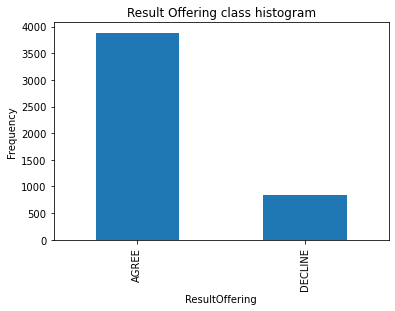

In [13]:

pd.value_counts(data['ResultOffering']).plot.bar()
plt.title('Result Offering class histogram')
plt.xlabel('ResultOffering')
plt.ylabel('Frequency')
data['ResultOffering'].value_counts()

# Clearly data-set has imbalanced class label for Result Offering !!

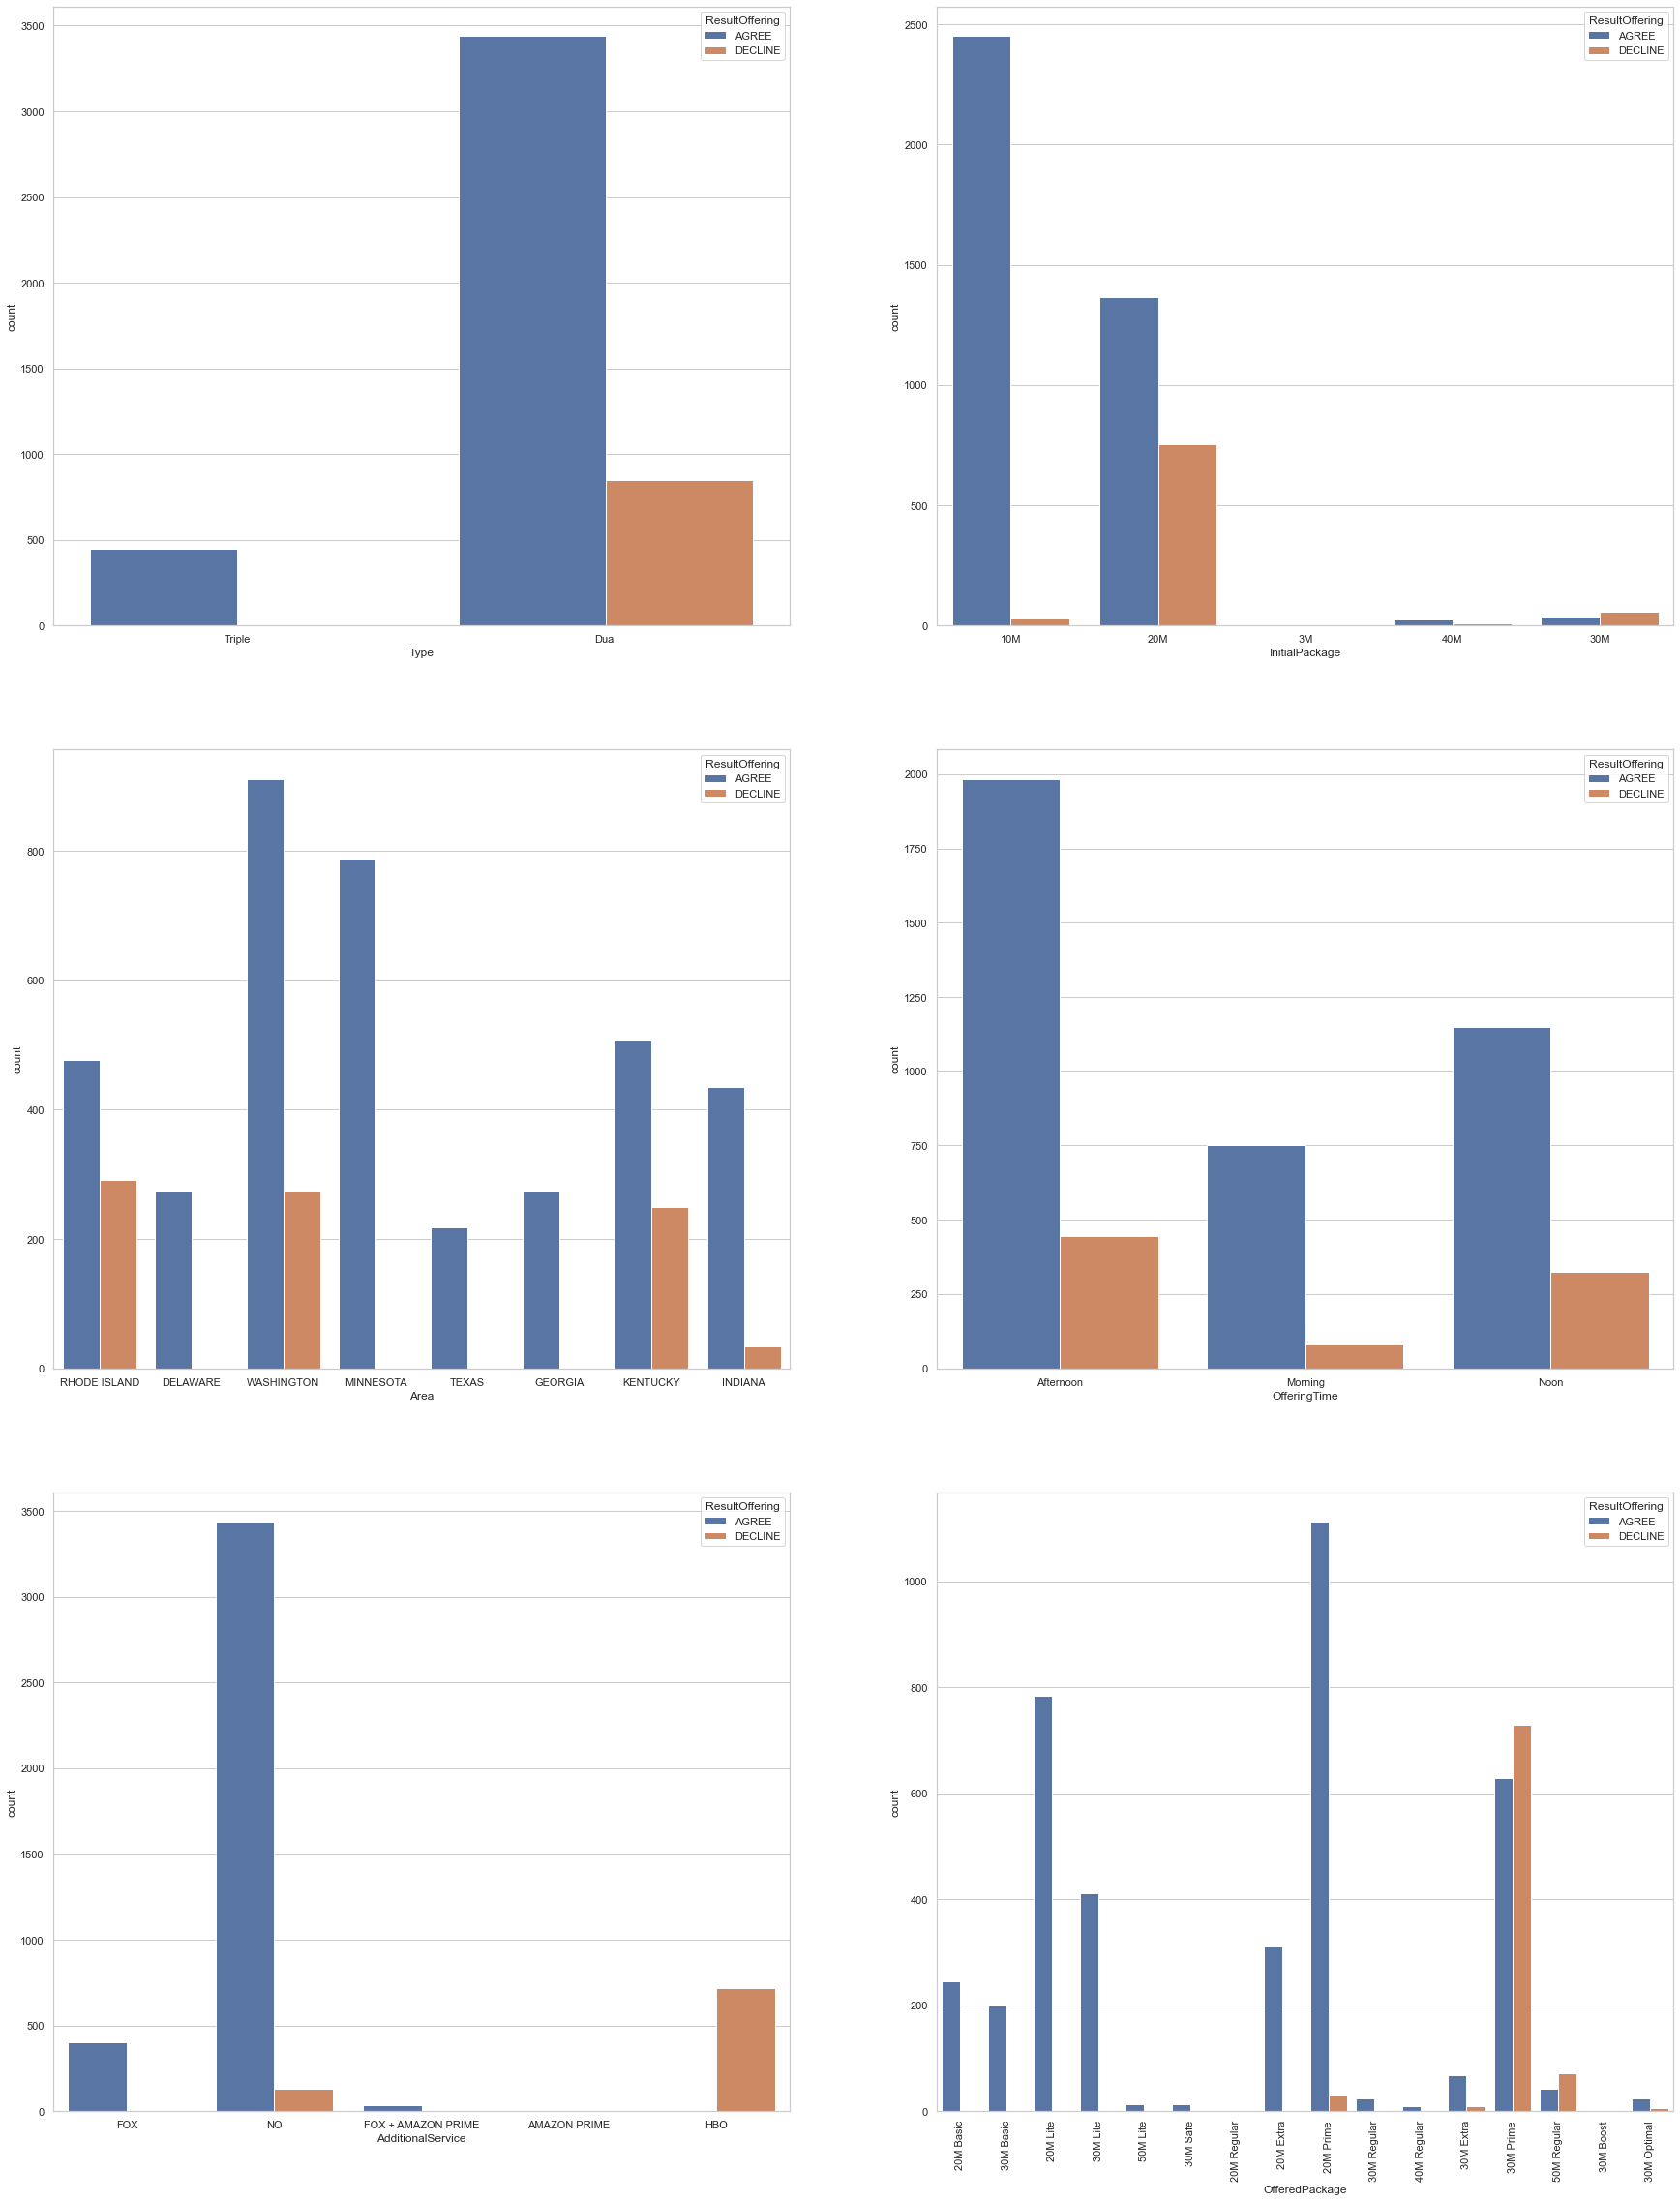

In [14]:
sns.set(style="whitegrid", color_codes=True)

fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize = (30,40))
sns.countplot(x="Type",data=data,hue=data['ResultOffering'], ax=axes[0][0])
sns.countplot(x="InitialPackage",data=data,hue=data['ResultOffering'], ax=axes[0][1])
sns.countplot(x="Area",data=data,hue=data['ResultOffering'], ax=axes[1][0])
ax=sns.countplot(x="OfferedPackage",data=data,hue=data['ResultOffering'], ax=axes[2][1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.countplot(x="AdditionalService",data=data,hue=data['ResultOffering'], ax=axes[2][0])
sns.countplot(x="OfferingTime",data=data,hue=data['ResultOffering'], ax=axes[1][1])




plt.show(fig)

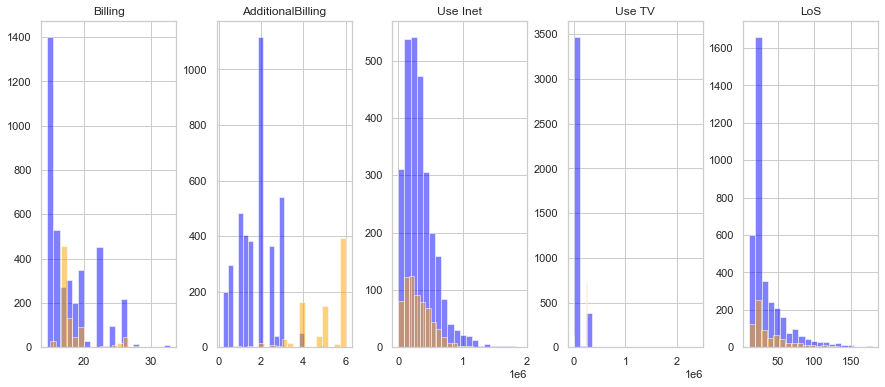

In [15]:

fig, ax = plt.subplots(1, 5, figsize=(15, 6))
#gunakan code berikut ini untuk memplot 2 lapisan untuk membedakan mana yang Churn (Orange) atau Tidak (Blue) 
data[data['ResultOffering'] == 'AGREE'][num_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
data[data['ResultOffering'] == 'DECLINE'][num_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

### Split Data

In [16]:

data_splits = train_test_split(x, y, test_size=0.25, random_state=0,
                               shuffle=True, stratify=y)
x_train, x_test, y_train, y_test = data_splits




In [25]:
from imblearn.over_sampling import SMOTENC

smote = SMOTENC(categorical_features=(x_train.dtypes == "category").values,
                random_state=42)


In [26]:
 x_train, y_train = smote.fit_resample(x_train, y_train)
    

ValueError: Input contains NaN

In [ ]:
x_train_cat, y_train_cat = smote.fit_resample(x_train_cat, y_train_cat)

In [ ]:

sns.countplot(x=y_train);


In [17]:
x_train.head()

,Type,InitialPackage,Billing,Area,OfferedPackage,AdditionalService,AdditionalBilling,OfferingTime,Use Inet,Use TV,LoS
3379,Dual,20M,19.17,MINNESOTA,30M Prime,NO,2.0,Morning,NaN,0,NaN
369,Dual,20M,25.83,MINNESOTA,30M Basic,NO,0.5,Morning,NaN,0,23.0
2299,Dual,10M,15.00,RHODE ISLAND,20M Prime,NO,2.0,Afternoon,160187.0,0,22.0
510,Dual,10M,15.00,MINNESOTA,20M Lite,NO,3.0,Noon,189744.0,0,23.0
3511,Dual,20M,19.17,KENTUCKY,30M Prime,NO,2.0,Afternoon,206083.0,0,NaN


In [18]:


num_transformer = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())  # z-score
    ]
)

cat_transformer = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='constant', fill_value='Undefined')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

data_transformer = ColumnTransformer(
    [
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

data_transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Billing', 'AdditionalBilling', 'Use Inet',
                                  'Use TV', 'LoS']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Undefined',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Type', 'InitialPackage', 'Area',
                                  'OfferedPackage', 'AdditionalService',
                               

### Neural Network

In [27]:
from sklearn import set_config
set_config(display='diagram')

from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import FunctionTransformer

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(128,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])

    return model

# wrap the model using the function you created
clf = KerasClassifier(build_fn=create_model)

pipenn = Pipeline(
    [
        ('preprocess', data_transformer),
        ('clf', clf)
    ]
)

In [28]:
pipenn.fit(x_train, y_train,
         clf__epochs=25)

Epoch 1/25
111/111 [==============================] - 1s 3ms/step - loss: 0.2513 - accuracy: 0.9121
Epoch 2/25
111/111 [==============================] - 0s 3ms/step - loss: 0.0757 - accuracy: 0.9730
Epoch 3/25
111/111 [==============================] - 0s 4ms/step - loss: 0.0637 - accuracy: 0.9755
Epoch 4/25
111/111 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9763
Epoch 5/25
111/111 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9769
Epoch 6/25
111/111 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9769
Epoch 7/25
111/111 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 0.9780
Epoch 8/25
111/111 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9780
Epoch 9/25
111/111 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9789
Epoch 10/25
111/111 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9775

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Billing',
                                                   'AdditionalBilling',
                                                   'Use Inet', 'Use TV',
                                                   'LoS']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Undefined',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'InitialPackage',
                                                   'Area', 'OfferedPackage',
                                                   'AdditionalService',
                                                   'OfferingTime'])])),
                ('clf',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002244AE47160>)])

In [ ]:
pipe.predict(x_test)

array([['AGREE'],
       ['AGREE'],
       ['AGREE'],
       ...,
       ['AGREE'],
       ['AGREE'],
       ['AGREE']], dtype=object)

In [ ]:
pipe.predict_proba(x_test) # probabilitas

array([[9.9953401e-01, 4.6601892e-04],
       [9.9921751e-01, 7.8251958e-04],
       [9.9999988e-01, 1.4737667e-07],
       ...,
       [9.9748015e-01, 2.5198162e-03],
       [9.9999118e-01, 8.8233983e-06],
       [9.9931622e-01, 6.8378448e-04]], dtype=float32)

In [ ]:
pipe.predict_proba(x_test)[:, 0] # probabilitas kelas AGREE

array([0.999534  , 0.9992175 , 0.9999999 , ..., 0.99748015, 0.9999912 ,
       0.9993162 ], dtype=float32)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pipenn.predict(x_train)))
print(classification_report(y_test, pipenn.predict(x_test)))

              precision    recall  f1-score   support

       AGREE       0.98      0.99      0.99      2913
     DECLINE       0.97      0.91      0.94       636

    accuracy                           0.98      3549
   macro avg       0.98      0.95      0.96      3549
weighted avg       0.98      0.98      0.98      3549

              precision    recall  f1-score   support

       AGREE       0.98      1.00      0.99       972
     DECLINE       0.98      0.90      0.94       212

    accuracy                           0.98      1184
   macro avg       0.98      0.95      0.96      1184
weighted avg       0.98      0.98      0.98      1184



In [42]:
#sav
import joblib
joblib.dump(pipenn, 'nn.joblib')

INFO:tensorflow:Assets written to: ram://d3dcef71-26e4-4ed5-a7a3-0f525f9f8a57/assets


['nn.joblib']

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
pipelog = Pipeline(
    [
        ('preprocess', data_transformer),
        ('sampling', SMOTE()),
        ('classifier', LogisticRegression(max_iter=np.Inf, random_state=123))
    ]
)

In [31]:

pipelog.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Billing',
                                                   'AdditionalBilling',
                                                   'Use Inet', 'Use TV',
                                                   'LoS']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Undefined',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'InitialPackage',
                                                   'Area', 'OfferedPackage',
                                                   'AdditionalService',
                                                   'OfferingTime'])])),
                ('sampling', SMOTE()),
                ('classifier',
                 LogisticRegression(max_iter=inf, random_state=123))])

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pipelog.predict(x_train)))
print(classification_report(y_test, pipelog.predict(x_test)))

              precision    recall  f1-score   support

       AGREE       0.99      0.97      0.98      2913
     DECLINE       0.88      0.95      0.91       636

    accuracy                           0.97      3549
   macro avg       0.93      0.96      0.95      3549
weighted avg       0.97      0.97      0.97      3549

              precision    recall  f1-score   support

       AGREE       0.99      0.97      0.98       972
     DECLINE       0.88      0.94      0.91       212

    accuracy                           0.97      1184
   macro avg       0.93      0.96      0.95      1184
weighted avg       0.97      0.97      0.97      1184



In [34]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, pipe.predict(x_train))
cnf_matrix

array([[2889,   24],
       [  45,  591]], dtype=int64)

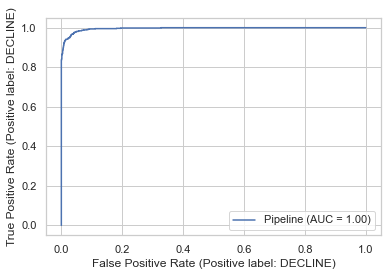

In [37]:
 metrics.plot_roc_curve(pipelog, x_train, y_train) 

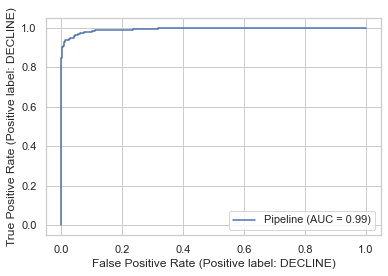

In [38]:
 metrics.plot_roc_curve(pipelog, x_test, y_test) 

In [39]:
from sklearn.metrics import roc_curve, auc
pipelog.fit(x_train,y_train)
probs = pipelog.predict_proba(x_test)
fpr1, tpr1, thresholds = roc_curve(y_test, probs[:, 1], pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

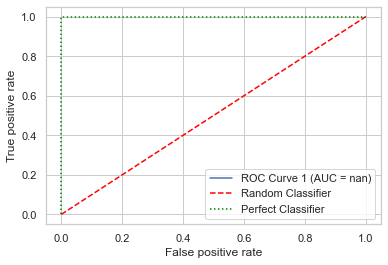

In [40]:
plt.plot(fpr1, tpr1, label='ROC Curve 1 (AUC = %0.2f)' % (roc_auc1))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

### Save Model

In [ ]:
from sklearn.externals import joblib
joblib.dump(pipe, 'logreg.pkl') 

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\940266\anaconda3\lib\site-packages\sklearn\externals\__init__.py)

In [ ]:
import joblib
joblib.dump(pipe, 'logreg.pkl')

['logreg.pkl']

In [ ]:
import joblib
joblib.dump(pipe, 'logreg.joblib')

['logreg.joblib']